In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mba263
import numpy as np
import seaborn as sns

In [2]:
import os
os.chdir(os.path.dirname(os.getcwd()))

In [3]:
plt.style.use('seaborn')

In [4]:
data = pd.read_csv('data/cell2cell.csv')
data.head()

,customer,calibrat,churn,churndep,revenue,mou,recchrge,directas,overage,roam,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,1000002,0,0,NaN,57.492500,482.75,37.424999,0.2475,22.75,0.0,...,0,0,1,0,0,5,0,0,149.989990,0
1,1000006,0,0,NaN,82.275002,1312.25,75.000000,1.2375,0.00,0.0,...,0,1,0,0,0,6,0,0,9.989998,0
2,1000010,0,0,NaN,31.662500,25.50,29.990000,0.2475,0.00,0.0,...,0,0,1,0,0,9,0,0,29.989990,0
3,1000011,0,0,NaN,62.127499,97.50,65.985001,2.4750,0.00,0.0,...,0,1,0,0,0,6,0,0,29.989990,0
4,1000014,0,0,NaN,25.225000,2.50,25.000000,0.0000,0.00,0.0,...,0,1,0,0,0,7,0,0,29.989990,0


In [5]:
# separate the two dfs
calibration = data[data['calibrat'] == 1]
validation = data[data['calibrat'] == 0]

In [6]:
dependent_var = ['customer', 'calibrat', 'churn']

independent_var = ['revenue', 'mou',
       'recchrge', 'directas', 'overage', 'roam', 'changem', 'changer',
       'dropvce', 'blckvce', 'unansvce', 'custcare', 'threeway', 'mourec',
       'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk', 'callfwdv',
       'callwait', 'months', 'uniqsubs', 'actvsubs', 'phones', 'models',
       'eqpdays', 'age1', 'age2', 'children', 'credita', 'creditaa',
       'prizmrur', 'prizmub', 'prizmtwn', 'refurb', 'webcap', 'truck', 'rv',
       'occprof', 'occcler', 'occcrft', 'occstud', 'occhmkr', 'occret',
       'occself', 'ownrent', 'marryun', 'marryyes', 'mailord', 'mailres',
       'mailflag', 'travel', 'pcown', 'creditcd', 'retcalls', 'retaccpt',
       'newcelly', 'newcelln', 'refer', 'incmiss', 'income', 'mcycle',
       'setprcm', 'setprc', 'retcall']

In [7]:
calibration_filtered = calibration[dependent_var + ['churndep'] + independent_var].dropna()

In [8]:
validation_filtered = validation[dependent_var + independent_var].dropna()

In [9]:
initial_model = mba263.logit_reg(calibration_filtered['churndep'], calibration_filtered[independent_var])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6715330588481454
            Iterations: 201
            Function evaluations: 256
            Gradient evaluations: 201


In [10]:
regression = mba263.regress(calibration_filtered['churndep'], calibration_filtered[independent_var])

In [11]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Mba263OLS Regression Results                         
==============================================================================
Dep. Variable:               churndep   R-squared:                       0.041
Model:                      Mba263OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     25.06
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          4.69e-295
Time:                        22:08:23   Log-Likelihood:                -27452.
No. Observations:               38941   AIC:                         5.504e+04
Df Residuals:                   38874   BIC:                         5.561e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5479      0.023     24.188      0.000       0.504       0.592
revenue        0.0004      0.000      2.496      0.013    9.61e-05       0.001
mou        -6.509e-05   1.17e-05     -5.556      0.000   -8.81e-05   -4.21e-05
recchrge      -0.0007      0.000     -3.577      0.000      -0.001      -0.000
directas      -0.0002      0.001     -0.131      0.896      -0.003       0.003
overage        0.0002   6.27e-05      2.802      0.005    5.28e-05       0.000
roam           0.0012      0.000      3.246      0.001       0.000       0.002
changem       -0.0001   1.23e-05     -9.145      0.000      -0.000   -8.87e-05
changer        0.0005   8.04e-05      6.397      0.000       0.000       0.001
dropvce        0.0025      0.002      1.484      0.138      -0.001       0.006
blckvce        0.0013      0.002      0.797      0.425      -0.002       0.005
unansvce       0.0002      0.000      2.025      0.043    6.84e-06       0.000
custcare      -0.0013      0.001     -2.352      0.019      -0.002      -0.000
threeway      -0.0070      0.003     -2.764      0.006      -0.012      -0.002
mourec      3.093e-05    3.1e-05      0.998      0.318   -2.98e-05    9.17e-05
outcalls       0.0003      0.000      1.943      0.052   -2.37e-06       0.001
incalls       -0.0007      0.000     -2.695      0.007      -0.001      -0.000
peakvce       -0.0002   5.14e-05     -2.935      0.003      -0.000   -5.01e-05
opeakvce   -6.393e-05    6.2e-05     -1.030      0.303      -0.000    5.77e-05
dropblk       -0.0006      0.002     -0.343      0.732      -0.004       0.003
callfwdv      -0.0005      0.006     -0.084      0.933      -0.011       0.010
callwait       0.0005      0.001      0.726      0.468      -0.001       0.002
months        -0.0051      0.000    -10.899      0.000      -0.006      -0.004
uniqsubs       0.0200      0.003      6.701      0.000       0.014       0.026
actvsubs      -0.0299      0.006     -5.021      0.000      -0.042      -0.018
phones         0.0115      0.004      2.682      0.007       0.003       0.020
models         0.0044      0.007      0.660      0.509      -0.009       0.017
eqpdays        0.0003   1.75e-05     19.549      0.000       0.000       0.000
age1          -0.0008      0.000     -3.807      0.000      -0.001      -0.000
age2          -0.0003      0.000     -1.692      0.091      -0.001    4.37e-05
children       0.0229      0.007      3.387      0.001       0.010       0.036
credita       -0.0465      0.008     -5.473      0.000      -0.063      -0.030
creditaa      -0.0905      0.008    -11.030      0.000      -0.107      -0.074
prizmrur       0.0171      0.012      1.437      0.151      -0.006       0.040
prizmub       -0.0093      0.006     -1.585      0.113      -0.021       0.002
prizmtwn       0.0118      0.008      1.566      0.117      -0.003       0.027
re

In [12]:
mba263.odds_ratios(initial_model)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
revenue,1.001965,0.000800,2.457656,0.014,1.000414,1.003517
mou,0.999719,0.000050,5.657852,0.000,0.999623,0.999815
recchrge,0.996882,0.000886,3.519019,0.000,0.995163,0.998601
directas,0.998804,0.005932,0.201561,0.840,0.987297,1.010312
overage,1.000761,0.000281,2.710142,0.007,1.000216,1.001305
...,...,...,...,...,...,...
income,0.986846,0.005955,2.208819,0.027,0.975293,0.998399
mcycle,1.129973,0.100550,1.292612,0.196,0.934905,1.325040
setprcm,0.908111,0.036791,2.497601,0.013,0.836737,0.979485
setprc,1.000620,0.000283,2.192644,0.028,1.000071,1.001169


In [13]:
filtered_vars = mba263.odds_ratios(initial_model).query("`P>|z|` < 0.05").index.to_list()
filtered_vars

['revenue',
 'mou',
 'recchrge',
 'overage',
 'roam',
 'changem',
 'changer',
 'unansvce',
 'custcare',
 'threeway',
 'incalls',
 'peakvce',
 'months',
 'uniqsubs',
 'actvsubs',
 'phones',
 'eqpdays',
 'age1',
 'children',
 'credita',
 'creditaa',
 'refurb',
 'webcap',
 'marryun',
 'newcelly',
 'income',
 'setprcm',
 'setprc',
 'retcall']

In [14]:
model_variables = filtered_vars

In [15]:
model = mba263.logit_reg(calibration_filtered['churndep'], calibration_filtered[model_variables])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6727914798501637
            Iterations: 83
            Function evaluations: 123
            Gradient evaluations: 83


In [16]:
new_regression = mba263.regress(calibration_filtered['churndep'], calibration_filtered[model_variables])

In [17]:
new_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Mba263OLS Regression Results                         
==============================================================================
Dep. Variable:               churndep   R-squared:                       0.038
Model:                      Mba263OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     53.54
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          6.49e-303
Time:                        22:08:24   Log-Likelihood:                -27501.
No. Observations:               38941   AIC:                         5.506e+04
Df Residuals:                   38911   BIC:                         5.532e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5502      0.018     29.869      0.000       0.514       0.586
revenue        0.0005      0.000      2.622      0.009       0.000       0.001
mou        -4.825e-05    9.4e-06     -5.131      0.000   -6.67e-05   -2.98e-05
recchrge      -0.0008      0.000     -3.752      0.000      -0.001      -0.000
overage        0.0002   6.09e-05      2.909      0.004    5.78e-05       0.000
roam           0.0012      0.000      3.383      0.001       0.001       0.002
changem       -0.0001   1.23e-05     -9.617      0.000      -0.000    -9.4e-05
changer        0.0005   8.04e-05      6.458      0.000       0.000       0.001
unansvce       0.0003   9.59e-05      2.852      0.004    8.56e-05       0.000
custcare      -0.0012      0.001     -2.189      0.029      -0.002      -0.000
threeway      -0.0047      0.002     -1.909      0.056      -0.010       0.000
incalls       -0.0004      0.000     -1.962      0.050      -0.001   -4.19e-07
peakvce    -6.794e-05   4.63e-05     -1.467      0.142      -0.000    2.29e-05
months        -0.0052      0.000    -11.497      0.000      -0.006      -0.004
uniqsubs       0.0202      0.003      6.767      0.000       0.014       0.026
actvsubs      -0.0305      0.006     -5.129      0.000      -0.042      -0.019
phones         0.0135      0.003      4.491      0.000       0.008       0.019
eqpdays        0.0003   1.71e-05     19.934      0.000       0.000       0.000
age1          -0.0009      0.000     -5.902      0.000      -0.001      -0.001
children       0.0196      0.006      3.149      0.002       0.007       0.032
credita       -0.0442      0.008     -5.225      0.000      -0.061      -0.028
creditaa      -0.0886      0.008    -10.853      0.000      -0.105      -0.073
refurb         0.0565      0.008      7.455      0.000       0.042       0.071
webcap        -0.0399      0.009     -4.469      0.000      -0.057      -0.022
marryun        0.0177      0.007      2.607      0.009       0.004       0.031
newcelly      -0.0179      0.006     -2.818      0.005      -0.030      -0.005
income        -0.0015      0.001     -1.381      0.167      -0.004       0.001
setprcm       -0.0264      0.010     -2.754      0.006      -0.045      -0.008
setprc         0.0001   6.73e-05      1.938      0.053   -1.46e-06       0.000
retcall        0.1715      0.013     13.086      0.000       0.146       0.197
==============================================================================
Omnibus:                   146669.234   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5540.246
Skew:                           0.003   Prob(JB):                         0.00
Kurtosis:                       1.152   Cond. No.                     6.39e+03
==============================================================================

N

In [18]:
calibration_filtered['prob'] = model.predict(calibration_filtered[model_variables])
validation_filtered['prob'] = model.predict(validation_filtered[model_variables])

In [19]:
mba263.lift(validation_filtered['churn'], validation_filtered['prob'])

array([172.34359846, 158.69262037, 147.88559604, 141.21392914,
       133.7883959 , 125.42524443, 118.96971582, 113.26978304,
       106.56126518, 100.        ])

In [20]:
calibration_filtered['decile'] = 10 - mba263.ntile(calibration_filtered['prob'], 10)
validation_filtered['decile'] = 10 - mba263.ntile(validation_filtered['prob'], 10)

validation_deciles = validation_filtered.groupby('decile').agg({'customer' : 'count', 'churn' : ['sum', 'mean']})
validation_deciles.columns = ['count', 'num_churn', 'churn_rate']

validation_deciles

,count,num_churn,churn_rate
decile,,,
1,3037,101,0.033257
2,3037,85,0.027988
3,3037,74,0.024366
4,3036,71,0.023386
5,3037,61,0.020086
6,3037,49,0.016134
7,3036,47,0.015481
8,3037,43,0.014159
9,3037,31,0.010207


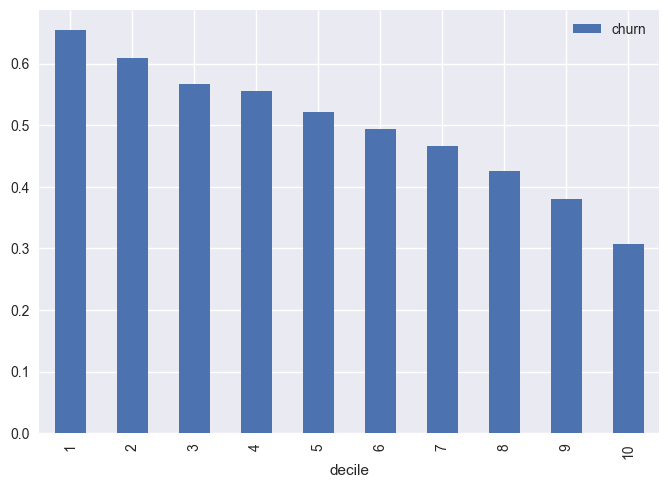

In [21]:
calibration_filtered[['decile', 'churn']].groupby('decile').mean().plot(kind = 'bar');

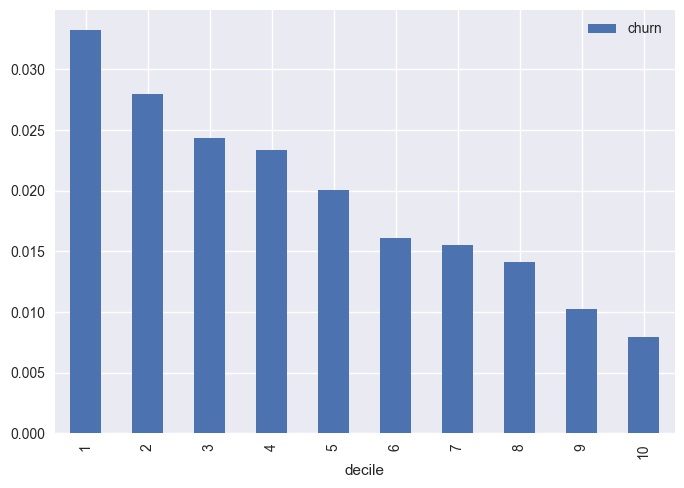

In [22]:
validation_filtered[['decile', 'churn']].groupby('decile').mean().plot(kind = 'bar');

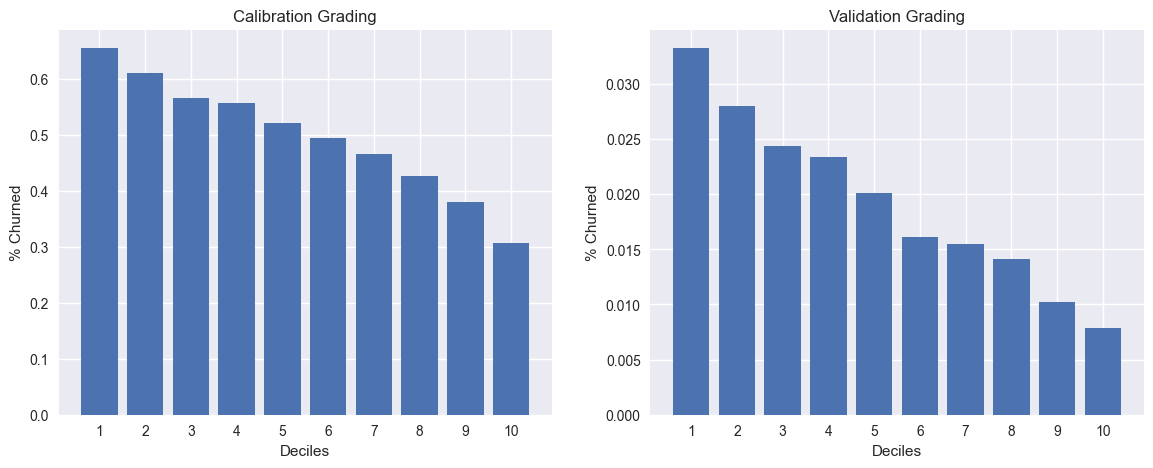

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].bar(calibration_filtered[['decile', 'churn']].groupby('decile').mean().index.tolist(), calibration_filtered[['decile', 'churn']].groupby('decile').mean()['churn'])
axs[1].bar(validation_filtered[['decile', 'churn']].groupby('decile').mean().index.tolist(), validation_filtered[['decile', 'churn']].groupby('decile').mean()['churn'])

axs[0].title.set_text('Calibration Grading')
axs[0].set_xlabel('Deciles')
axs[0].set_ylabel('% Churned')
axs[0].set_xticks(np.arange(1, 11))

axs[1].title.set_text('Validation Grading')
axs[1].set_xlabel('Deciles')
axs[1].set_ylabel('% Churned')
axs[1].set_xticks(np.arange(1, 11));

In [24]:
validation_churn = sum(validation_filtered['churn']) / len(validation_filtered)
validation_deciles['lift'] = (validation_deciles['churn_rate'] / validation_churn) * 100
validation_deciles['cum_lift'] = ((validation_deciles['num_churn'].cumsum() / validation_deciles['count'].cumsum()) / validation_churn) * 100
validation_deciles

,count,num_churn,churn_rate,lift,cum_lift
decile,,,,,
1,3037,101,0.033257,172.343598,172.343598
2,3037,85,0.027988,145.041642,158.692620
3,3037,74,0.024366,126.271547,147.885596
4,3036,71,0.023386,121.192336,141.213929
5,3037,61,0.020086,104.088708,133.788396
6,3037,49,0.016134,83.612241,125.425244
7,3036,47,0.015481,80.225912,118.969716
8,3037,43,0.014159,73.374007,113.269783
9,3037,31,0.010207,52.897540,106.561265


Want a monotonic relationship for lift chart, better model

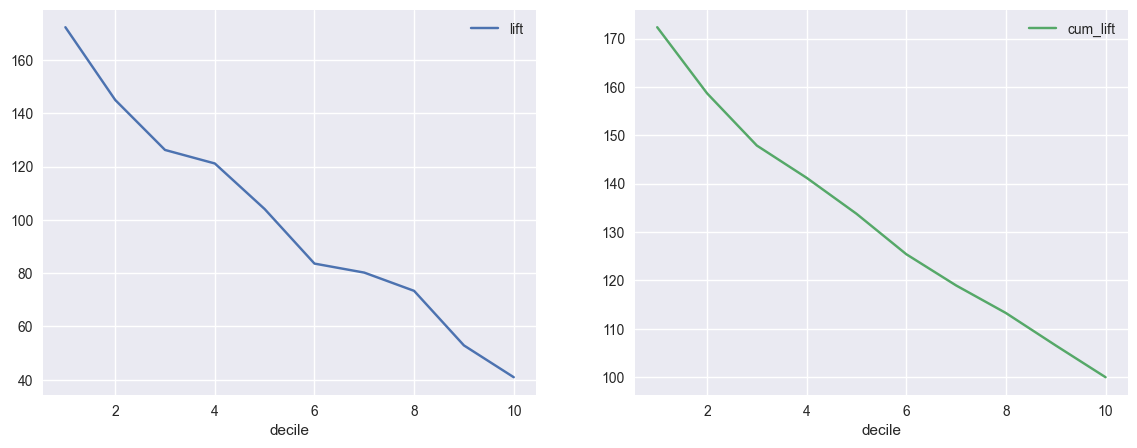

In [25]:
validation_deciles[['lift', 'cum_lift']].plot(subplots = True, figsize=(14, 5), layout = (1, 2))
plt.show();

### Normalizing the Odds Ratio of the Model

In [26]:
mba263.odds_ratios(model)['Odds ratios'].sort_values(ascending=False)

retcall     2.097080
refurb      1.264295
uniqsubs    1.203820
children    1.083012
marryun     1.072678
phones      1.056273
roam        1.007515
changer     1.002328
revenue     1.002028
eqpdays     1.001433
unansvce    1.001212
overage     1.000748
setprc      1.000585
mou         0.999794
peakvce     0.999683
changem     0.999488
incalls     0.998188
recchrge    0.996746
age1        0.996107
custcare    0.994638
income      0.993205
threeway    0.980656
months      0.978629
newcelly    0.931861
setprcm     0.899284
webcap      0.852429
credita     0.845829
actvsubs    0.811331
creditaa    0.702221
Name: Odds ratios, dtype: float64

In [27]:
X_std = validation_filtered[model_variables].std()
odds_ratios = mba263.odds_ratios(model)['Odds ratios']
normalized_odds_ratios = np.power(odds_ratios, X_std)

In [28]:
normalized_odds_ratios[normalized_odds_ratios < 1] = 1 / normalized_odds_ratios[normalized_odds_ratios < 1]
normalized_odds_ratios.sort_values(ascending=False)

eqpdays     1.427469
months      1.239455
uniqsubs    1.167427
actvsubs    1.138473
changem     1.135387
creditaa    1.131327
retcall     1.122968
mou         1.116249
revenue     1.093982
changer     1.090884
age1        1.090015
refurb      1.082822
recchrge    1.081634
roam        1.078062
phones      1.077136
overage     1.072706
setprcm     1.054183
credita     1.053405
unansvce    1.049139
webcap      1.045899
children    1.034848
peakvce     1.034524
marryun     1.034437
setprc      1.034231
incalls     1.030062
newcelly    1.028256
custcare    1.028077
threeway    1.025060
income      1.021362
dtype: float64

In [29]:
validation_filtered[filtered_vars + ['decile', 'churn']]

,revenue,mou,recchrge,overage,roam,changem,changer,unansvce,custcare,threeway,...,refurb,webcap,marryun,newcelly,income,setprcm,setprc,retcall,decile,churn
0,57.492500,482.75,37.424999,22.75,0.0,532.25,50.987499,61.333332,1.666667,0.333333,...,0,1,0,0,5,0,149.989990,0,10,0
1,82.275002,1312.25,75.000000,0.00,0.0,156.75,8.145001,76.000000,4.333334,1.333333,...,0,1,0,1,6,0,9.989998,0,10,0
2,31.662500,25.50,29.990000,0.00,0.0,59.50,4.027500,2.333333,0.000000,0.000000,...,0,1,0,0,9,0,29.989990,0,10,0
3,62.127499,97.50,65.985001,0.00,0.0,23.50,6.822500,4.000000,4.000000,0.000000,...,0,1,0,1,6,0,29.989990,0,10,0
4,25.225000,2.50,25.000000,0.00,0.0,-2.50,-0.225000,0.333333,0.000000,0.000000,...,0,1,1,1,7,0,29.989990,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31039,34.990002,163.50,44.990002,0.00,0.0,48.50,0.000000,11.000000,0.000000,0.000000,...,0,0,0,0,4,1,0.000000,0,1,1
31040,95.559998,871.50,59.990002,150.25,0.0,186.50,32.130001,32.666668,0.000000,0.000000,...,1,1,0,0,1,0,149.989990,0,9,1
31041,29.990000,71.50,29.990000,0.00,0.0,-32.50,0.000000,0.333333,0.333333,0.000000,...,0,1,0,0,8,1,0.000000,0,1,1
31043,16.990000,0.00,16.990000,0.00,0.0,0.00,0.000000,0.666667,0.000000,0.000000,...,0,0,0,0,6,1,0.000000,0,1,1


### Incentive Data

In [30]:
validation_filtered[filtered_vars + ['decile', 'churn']]

,revenue,mou,recchrge,overage,roam,changem,changer,unansvce,custcare,threeway,...,refurb,webcap,marryun,newcelly,income,setprcm,setprc,retcall,decile,churn
0,57.492500,482.75,37.424999,22.75,0.0,532.25,50.987499,61.333332,1.666667,0.333333,...,0,1,0,0,5,0,149.989990,0,10,0
1,82.275002,1312.25,75.000000,0.00,0.0,156.75,8.145001,76.000000,4.333334,1.333333,...,0,1,0,1,6,0,9.989998,0,10,0
2,31.662500,25.50,29.990000,0.00,0.0,59.50,4.027500,2.333333,0.000000,0.000000,...,0,1,0,0,9,0,29.989990,0,10,0
3,62.127499,97.50,65.985001,0.00,0.0,23.50,6.822500,4.000000,4.000000,0.000000,...,0,1,0,1,6,0,29.989990,0,10,0
4,25.225000,2.50,25.000000,0.00,0.0,-2.50,-0.225000,0.333333,0.000000,0.000000,...,0,1,1,1,7,0,29.989990,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31039,34.990002,163.50,44.990002,0.00,0.0,48.50,0.000000,11.000000,0.000000,0.000000,...,0,0,0,0,4,1,0.000000,0,1,1
31040,95.559998,871.50,59.990002,150.25,0.0,186.50,32.130001,32.666668,0.000000,0.000000,...,1,1,0,0,1,0,149.989990,0,9,1
31041,29.990000,71.50,29.990000,0.00,0.0,-32.50,0.000000,0.333333,0.333333,0.000000,...,0,1,0,0,8,1,0.000000,0,1,1
31043,16.990000,0.00,16.990000,0.00,0.0,0.00,0.000000,0.666667,0.000000,0.000000,...,0,0,0,0,6,1,0.000000,0,1,1


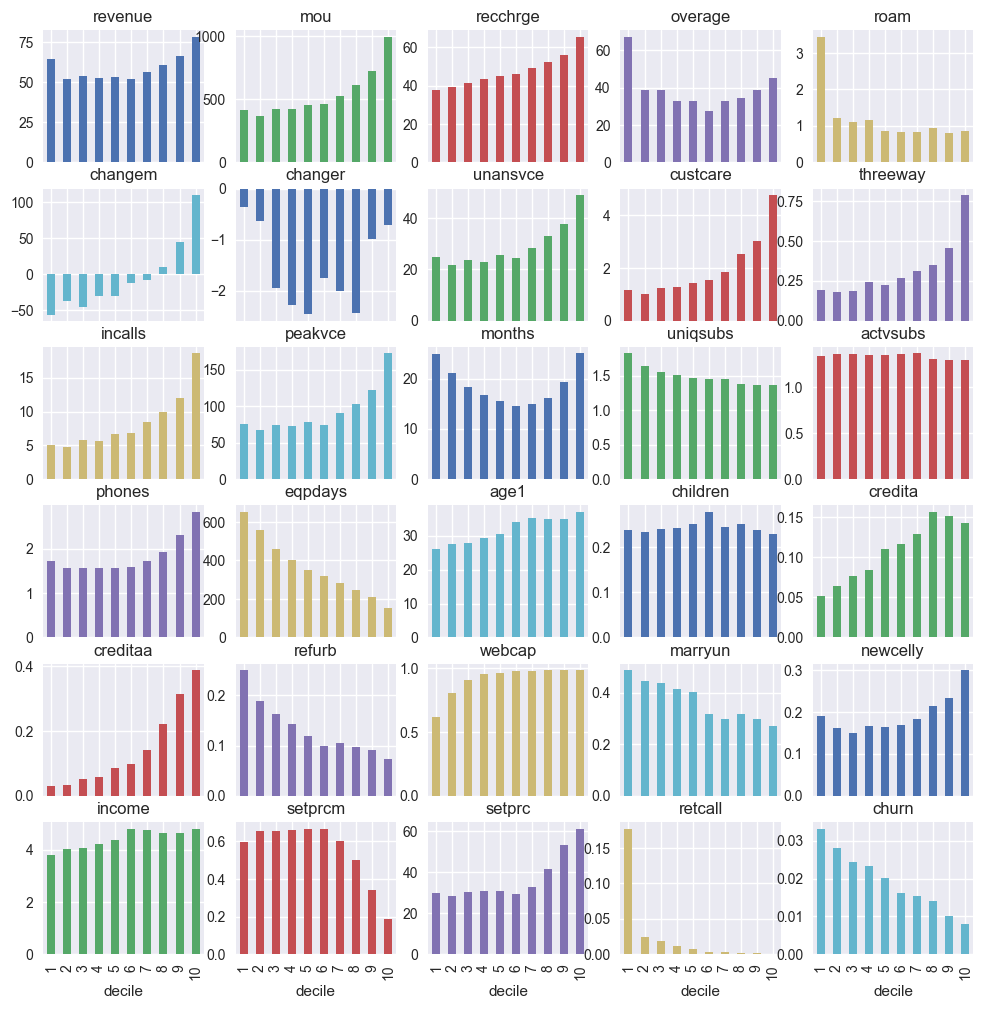

In [31]:
validation_filtered[filtered_vars + ['decile', 'churn']].groupby('decile').mean().plot(kind = 'bar', 
                                                                                       subplots = True, 
                                                                                       figsize = (12, 12), 
                                                                                       layout = (6, 5), 
                                                                                       sharex = True,
                                                                                       legend = False
                                                                                      );

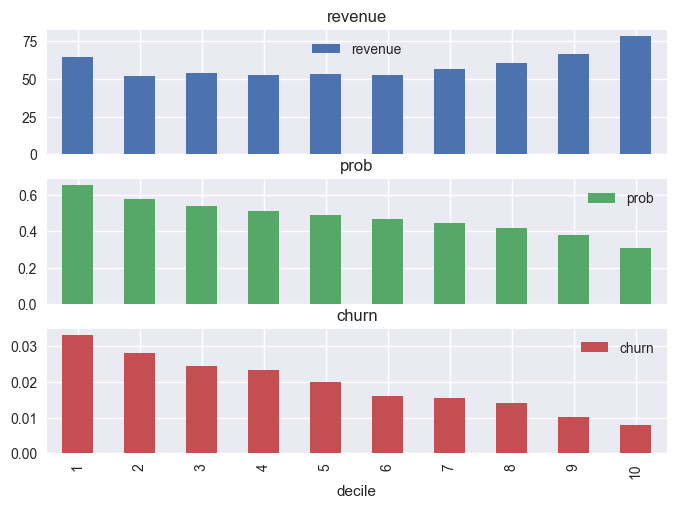

In [30]:
validation_filtered[['revenue', 'prob', 'churn', 'decile']].groupby('decile').mean().plot(kind = 'bar', subplots = True);

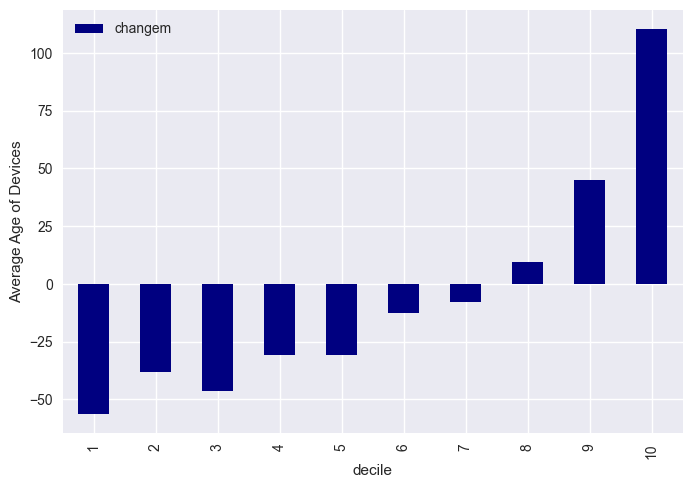

In [42]:
validation_filtered[filtered_vars + ['decile', 'churn']].groupby('decile').mean()[['changem']].plot(kind = 'bar', color = 'navy')
plt.ylabel('Average Age of Devices');